In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

In [12]:
import folium
from folium import PolyLine
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
# Function to convert hex color to RGB tuple
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    hlen = len(hex_color)
    return tuple(int(hex_color[i:i+hlen//3], 16)/255 for i in range(0, hlen, hlen//3))

def dms_to_dd(dms):
    degrees, minutes, seconds, direction = dms
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60)
    if direction in ['S', 'W']:
        dd *= -1
    return dd

# Define coordinates in DMS and corresponding hex RGB values
# Format: [((latitude DMS), (longitude DMS)), 'hex_color']
points_with_colors = [
    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#c6c6d5'), # video taken at ferihumerstrasse in morning time, IMG_3212.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#c2c6c9'), # video taken at ferihumerstrasse in morning time, IMG_3215.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#d0d1db'), # video taken at ferihumerstrasse in morning time, IMG_3218.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#d0d0d5'), # video taken at hauptplatz in morning time, IMG_1632.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#c4c7cd'), # video taken at hauptplatz in morning time, IMG_1634.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#babec5'), # video taken at hauptplatz in morning time, IMG_1642.mov    
    
    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#cdc9d0'), # video taken at sudbahnmarket in morning time, IMG_5375_s.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#c6c7d1'), # video taken at sudbahnmarket in morning time, IMG_5377_s.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#d0c3ca'), # video taken at sudbahnmarket in morning time, IMG_5378_s.mov    

    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#d5d8e0'), # video taken at ferihumerstrasse in afternoon time, IMG_1663.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#d6d8d0'), # video taken at ferihumerstrasse in afternoon time, IMG_1667.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#e3e3dd'), # video taken at ferihumerstrasse in afternoon time, IMG_1671.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#dadcdc'), # video taken at hauptplatz in afternoon time, IMG_0418_s.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#dcdedd'), # video taken at hauptplatz in afternoon time, IMG_0428_s.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#eaecea'), # video taken at hauptplatz in afternoon time, IMG_0431_s.mov    

    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#d5d5d7'), # video taken at sudbahnmarket in afternoon time, IMG_0439.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#d2d2d3'), # video taken at sudbahnmarket in afternoon time, IMG_0440.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#e1d5d4'), # video taken at sudbahnmarket in afternoon time, IMG_0441.mov    

]

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat)} for (lat, lon), _ in decimal_points_with_colors]
)

In [7]:
# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat)} for (lat, lon), _ in decimal_points_with_colors]
)

In [10]:
# Convert the coordinates to decimal degrees
points = [(dms_to_dd(lat), dms_to_dd(lon)) for (lat, lon), _ in points_with_colors]

# Calculate the center of your points for initial map focus
latitudes, longitudes = zip(*points)
center_lat = sum(latitudes) / len(latitudes)
center_lon = sum(longitudes) / len(longitudes)

# Create a folium map with a satellite base
m = folium.Map(location=[center_lat, center_lon], zoom_start=15, tiles='Stamen Terrain')

# Add points to the map
for ((lat_dms, lon_dms), color), (lat, lon) in zip(points_with_colors, points):
    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Save the map to an HTML file
m.save("map.html")

In [14]:
# Function to generate a range of floating point numbers
def frange(start, stop, step):
    while start < stop:
        yield round(start, 6)
        start += step

In [15]:
# Convert coordinates to decimal degrees
points = [(dms_to_dd(lat), dms_to_dd(lon)) for (lat, lon), _ in points_with_colors]

# Calculate center for the map
latitudes, longitudes = zip(*points)
center_lat = sum(latitudes) / len(latitudes)
center_lon = sum(longitudes) / len(longitudes)

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=15, tiles='Stamen Terrain')

# Add points to the map
for ((lat_dms, lon_dms), color), (lat, lon) in zip(points_with_colors, points):
    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Add grid lines
# Define grid bounds and spacing
lat_min = min(latitudes)
lat_max = max(latitudes)
lon_min = min(longitudes)
lon_max = max(longitudes)
grid_spacing = 0.001  # Adjust as needed

# Vertical lines
for lon in frange(lon_min, lon_max, grid_spacing):
    line_points = [(lat_min, lon), (lat_max, lon)]
    PolyLine(line_points, color="blue", weight=1).add_to(m)

# Horizontal lines
for lat in frange(lat_min, lat_max, grid_spacing):
    line_points = [(lat, lon_min), (lat, lon_max)]
    PolyLine(line_points, color="blue", weight=1).add_to(m)



# Save the map to an HTML file
m.save("map_with_grid.html")


In [16]:
# Convert coordinates to decimal degrees
points = [(dms_to_dd(lat), dms_to_dd(lon)) for (lat, lon), _ in points_with_colors]

# Calculate center for the map
latitudes, longitudes = zip(*points)
center_lat = sum(latitudes) / len(latitudes)
center_lon = sum(longitudes) / len(longitudes)

# Create the map with a satellite base layer
m = folium.Map(location=[center_lat, center_lon], zoom_start=15, tiles='Esri.WorldImagery')

# Add points to the map
for ((lat_dms, lon_dms), color), (lat, lon) in zip(points_with_colors, points):
    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Save the map to an HTML file
m.save("map_satellite.html")

ValueError: Custom tiles must have an attribution.

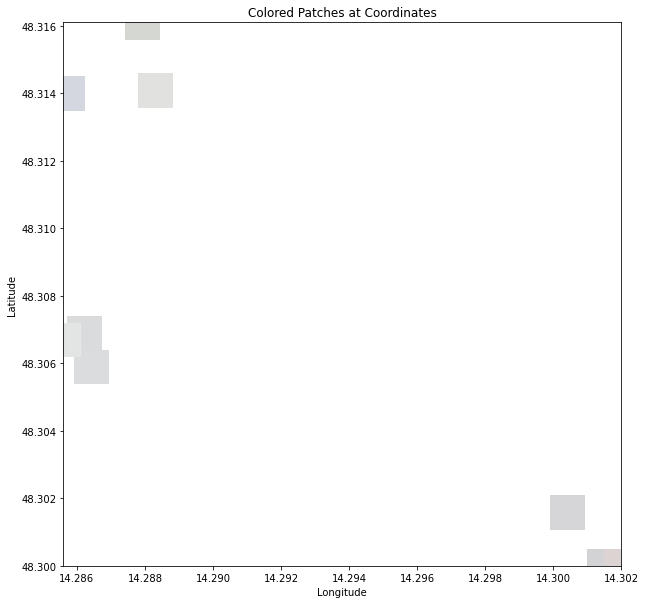

In [22]:
# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Adjust the size of the square patches here
patch_size = 0.001  # Example size, you may adjust this

# Adding each point as a colored square patch
for point in gdf.itertuples():
    ax.add_patch(plt.Rectangle(
        (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
        patch_size, patch_size,
        color=point.color, alpha=0.7)
    )

# Setting the bounds of the plot to the bounds of your data
bounds = gdf.total_bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Adding basemap (optional, uncomment to use)
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Colored Patches at Coordinates')
plt.show()


/Users/youngjuene/anaconda3/envs/linz/lib/python3.8/site-packages/contextily/tile.py:614: UserWarning:

The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 19).



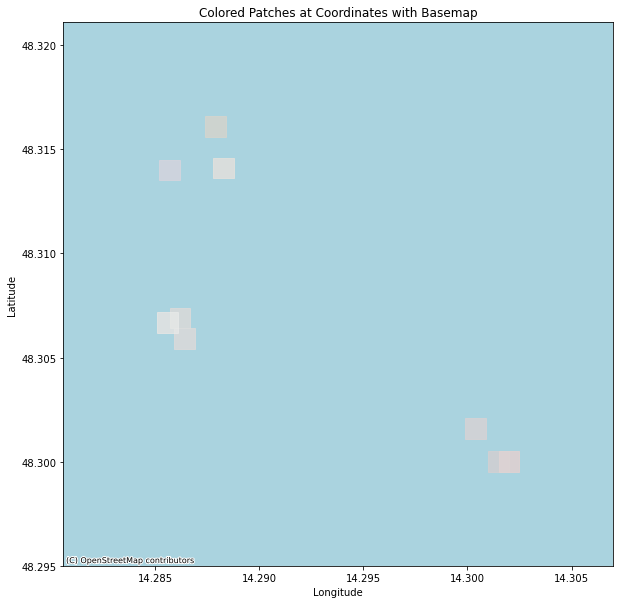

In [30]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Adjust the size of the square patches here
patch_size = 0.001  # Example size, adjust as needed

# Adding each point as a colored square patch
for point in gdf.itertuples():
    ax.add_patch(plt.Rectangle(
        (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
        patch_size, patch_size,
        color=point.color, alpha=0.7)
    )

# Adding padding to the bounds
bounds = gdf.total_bounds
padding = 0.005  # Adjust the padding as needed
ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

# Adding basemap for streets or aerial imagery
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # For street map
# ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)  # For aerial imagery

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Colored Patches at Coordinates with Basemap')
plt.show()

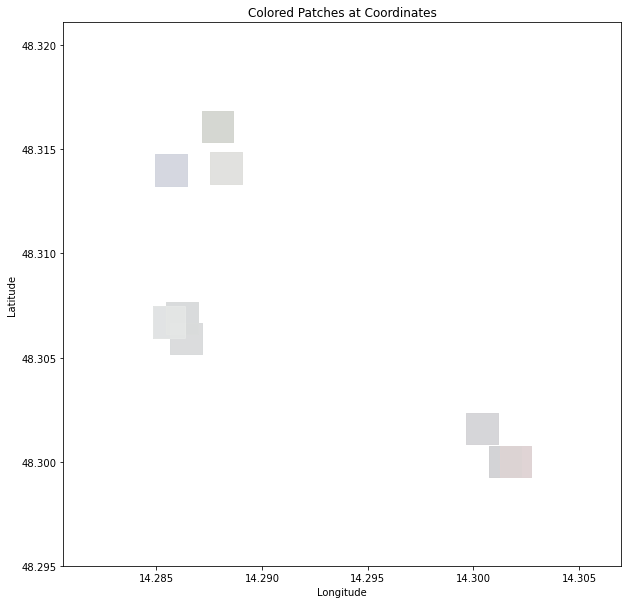

In [34]:
# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Adjust the size of the square patches here
patch_size = 0.0015  # Example size, you may adjust this

# Adding each point as a colored square patch
for point in gdf.itertuples():
    ax.add_patch(plt.Rectangle(
        (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
        patch_size, patch_size,
        color=point.color, alpha=0.7)
    )

# Adding padding to the bounds
bounds = gdf.total_bounds
padding = 0.005  # Adjust the padding as needed
ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

# Adding basemap (optional, uncomment to use)
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Colored Patches at Coordinates')
plt.show()


# subplot

In [42]:
# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

In [43]:
# Split data into morning and afternoon
morning_data = [item for item in decimal_points_with_colors if 'morning' in item[1]]
afternoon_data = [item for item in decimal_points_with_colors if 'afternoon' in item[1]]

AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column ('geometry') is not present. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

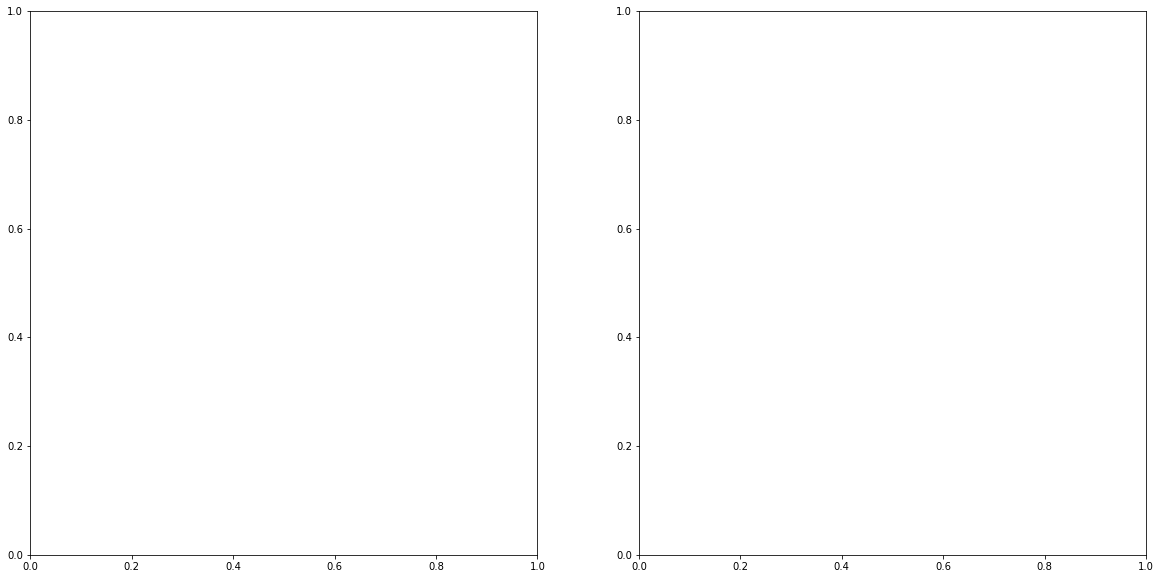

In [44]:
# Function to plot data
def plot_data(data, ax, title):
    gdf = gpd.GeoDataFrame(
        [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
         for (lat, lon), color in data]
    )

    patch_size = 0.0015

    for point in gdf.itertuples():
        ax.add_patch(plt.Rectangle(
            (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
            patch_size, patch_size,
            color=point.color, alpha=0.7)
        )

    bounds = gdf.total_bounds
    padding = 0.005
    ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
    ax.set_ylim(bounds[1] - padding, bounds[3] + padding)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)

    # Adding basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

plot_data(morning_data, axs[0], 'Morning Coordinates')
plot_data(afternoon_data, axs[1], 'Afternoon Coordinates')

plt.tight_layout()
plt.show()


## simple

In [45]:
# Define coordinates in DMS and corresponding hex RGB values
# Format: [((latitude DMS), (longitude DMS)), 'hex_color']
points_with_colors = [
    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#c6c6d5'), # video taken at ferihumerstrasse in morning time, IMG_3212.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#c2c6c9'), # video taken at ferihumerstrasse in morning time, IMG_3215.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#d0d1db'), # video taken at ferihumerstrasse in morning time, IMG_3218.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#d0d0d5'), # video taken at hauptplatz in morning time, IMG_1632.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#c4c7cd'), # video taken at hauptplatz in morning time, IMG_1634.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#babec5'), # video taken at hauptplatz in morning time, IMG_1642.mov    
    
    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#cdc9d0'), # video taken at sudbahnmarket in morning time, IMG_5375_s.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#c6c7d1'), # video taken at sudbahnmarket in morning time, IMG_5377_s.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#d0c3ca'), # video taken at sudbahnmarket in morning time, IMG_5378_s.mov    

    # (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#d5d8e0'), # video taken at ferihumerstrasse in afternoon time, IMG_1663.mov
    # (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#d6d8d0'), # video taken at ferihumerstrasse in afternoon time, IMG_1667.mov
    # (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#e3e3dd'), # video taken at ferihumerstrasse in afternoon time, IMG_1671.mov
    
    # (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#dadcdc'), # video taken at hauptplatz in afternoon time, IMG_0418_s.mov
    # (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#dcdedd'), # video taken at hauptplatz in afternoon time, IMG_0428_s.mov
    # (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#eaecea'), # video taken at hauptplatz in afternoon time, IMG_0431_s.mov    

    # (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#d5d5d7'), # video taken at sudbahnmarket in afternoon time, IMG_0439.mov
    # (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#d2d2d3'), # video taken at sudbahnmarket in afternoon time, IMG_0440.mov
    # (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#e1d5d4'), # video taken at sudbahnmarket in afternoon time, IMG_0441.mov    

]

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat)} for (lat, lon), _ in decimal_points_with_colors]
)

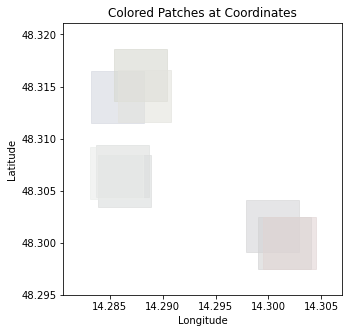

In [51]:
# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))

# Adjust the size of the square patches here
patch_size = 0.005  # Example size, you may adjust this

# Adding each point as a colored square patch
for point in gdf.itertuples():
    ax.add_patch(plt.Rectangle(
        (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
        patch_size, patch_size,
        color=point.color, alpha=0.6)
    )

# Adding padding to the bounds
bounds = gdf.total_bounds
padding = 0.005  # Adjust the padding as needed
ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

# Adding basemap (optional, uncomment to use)
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Colored Patches at Coordinates')
plt.show()

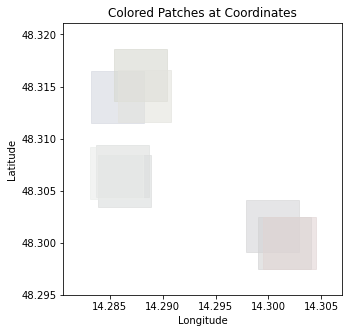

In [114]:
# Define coordinates in DMS and corresponding hex RGB values
# Format: [((latitude DMS), (longitude DMS)), 'hex_color']
points_with_colors = [
    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#d5d8e0'), # video taken at ferihumerstrasse in afternoon time, IMG_1663.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#d6d8d0'), # video taken at ferihumerstrasse in afternoon time, IMG_1667.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#e3e3dd'), # video taken at ferihumerstrasse in afternoon time, IMG_1671.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#dadcdc'), # video taken at hauptplatz in afternoon time, IMG_0418_s.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#dcdedd'), # video taken at hauptplatz in afternoon time, IMG_0428_s.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#eaecea'), # video taken at hauptplatz in afternoon time, IMG_0431_s.mov    

    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#d5d5d7'), # video taken at sudbahnmarket in afternoon time, IMG_0439.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#d2d2d3'), # video taken at sudbahnmarket in afternoon time, IMG_0440.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#e1d5d4'), # video taken at sudbahnmarket in afternoon time, IMG_0441.mov    
]

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat)} for (lat, lon), _ in decimal_points_with_colors]
)

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))

# Adjust the size of the square patches here
patch_size = 0.005  # Example size, you may adjust this

# Adding each point as a colored square patch
for point in gdf.itertuples():
    ax.add_patch(plt.Rectangle(
        (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
        patch_size, patch_size,
        color=point.color, alpha=0.6)
    )

# Adding padding to the bounds
bounds = gdf.total_bounds
padding = 0.005  # Adjust the padding as needed
ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

# Adding basemap (optional, uncomment to use)
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Colored Patches at Coordinates')
plt.show()


In [121]:
# Define coordinates in DMS and corresponding hex RGB values
# Format: [((latitude DMS), (longitude DMS)), 'hex_color']
points_with_colors = [
    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#d5d8e0'), # video taken at ferihumerstrasse in afternoon time, IMG_1663.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#d6d8d0'), # video taken at ferihumerstrasse in afternoon time, IMG_1667.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#e3e3dd'), # video taken at ferihumerstrasse in afternoon time, IMG_1671.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#dadcdc'), # video taken at hauptplatz in afternoon time, IMG_0418_s.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#dcdedd'), # video taken at hauptplatz in afternoon time, IMG_0428_s.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#eaecea'), # video taken at hauptplatz in afternoon time, IMG_0431_s.mov    

    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#d5d5d7'), # video taken at sudbahnmarket in afternoon time, IMG_0439.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#d2d2d3'), # video taken at sudbahnmarket in afternoon time, IMG_0440.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#e1d5d4'), # video taken at sudbahnmarket in afternoon time, IMG_0441.mov    
]

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat)} for (lat, lon), _ in decimal_points_with_colors]
)

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Directory for saving frames
frame_dir = './frames_v3'
os.makedirs(frame_dir, exist_ok=True)

# Number of frames for a 1-minute video at 30 FPS
num_frames = 60 * 30  

for frame in range(num_frames):
    # Plotting
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # # Adjust the size of the square patches here
    # patch_size = 0.005  # Example size, you may adjust this
    
    # # Adding each point as a colored square patch
    # for point in gdf.itertuples():
    #     ax.add_patch(plt.Rectangle(
    #         (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
    #         patch_size, patch_size,
    #         color=point.color, alpha=0.6)
    #     )
    
    # # Adding padding to the bounds
    # bounds = gdf.total_bounds
    # padding = 0.005  # Adjust the padding as needed
    # ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
    # ax.set_ylim(bounds[1] - padding, bounds[3] + padding)
    
    # # Adding basemap (optional, uncomment to use)
    # # ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    # plt.title('Colored Patches at Coordinates')
    # plt.show()

     
    base_patch_size = 0.004
    for point in gdf.itertuples():
        patch_size = base_patch_size * random.uniform(0.75, 1.25)
        ax.add_patch(plt.Rectangle(
            (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
            patch_size, patch_size,
            color=point.color, alpha=0.7)
        )

    bounds = gdf.total_bounds
    padding = 0.005
    ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
    ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(os.path.join(frame_dir, f'frame_{frame:04d}.png'), dpi=300, bbox_inches='tight')
    plt.close(fig)


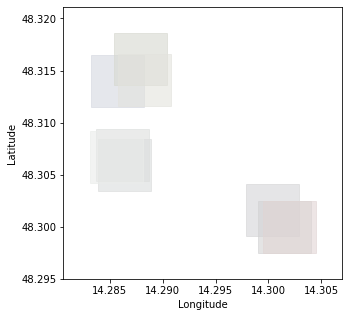

In [120]:
# Define coordinates in DMS and corresponding hex RGB values
# Format: [((latitude DMS), (longitude DMS)), 'hex_color']
points_with_colors = [
    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#d5d8e0'), # video taken at ferihumerstrasse in afternoon time, IMG_1663.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#d6d8d0'), # video taken at ferihumerstrasse in afternoon time, IMG_1667.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#e3e3dd'), # video taken at ferihumerstrasse in afternoon time, IMG_1671.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#dadcdc'), # video taken at hauptplatz in afternoon time, IMG_0418_s.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#dcdedd'), # video taken at hauptplatz in afternoon time, IMG_0428_s.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#eaecea'), # video taken at hauptplatz in afternoon time, IMG_0431_s.mov    

    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#d5d5d7'), # video taken at sudbahnmarket in afternoon time, IMG_0439.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#d2d2d3'), # video taken at sudbahnmarket in afternoon time, IMG_0440.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#e1d5d4'), # video taken at sudbahnmarket in afternoon time, IMG_0441.mov    
]

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat)} for (lat, lon), _ in decimal_points_with_colors]
)

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))

# Adjust the size of the square patches here
patch_size = 0.005  # Example size, you may adjust this

# Adding each point as a colored square patch
for point in gdf.itertuples():
    ax.add_patch(plt.Rectangle(
        (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
        patch_size, patch_size,
        color=point.color, alpha=0.6)
    )

# Adding padding to the bounds
bounds = gdf.total_bounds
padding = 0.005  # Adjust the padding as needed
ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

# Adding basemap (optional, uncomment to use)
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Colored Patches at Coordinates')
plt.savefig('patch_fig.png', dpi=300, bbox_inches='tight')
plt.show()

    

In [ ]:
#it works

AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column ('geometry') is not present. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

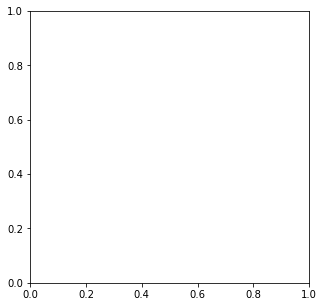

In [108]:
# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [
    ((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) 
    for (lat_dms, lon_dms), color in points_with_colors
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
     for (lat, lon), color in decimal_points_with_colors]
)

# Directory for saving frames
frame_dir = './frames_v2'
os.makedirs(frame_dir, exist_ok=True)

# Number of frames for a 1-minute video at 30 FPS
num_frames = 60 * 30  

for frame in range(num_frames):
    fig, ax = plt.subplots(figsize=(5, 5))

    base_patch_size = 0.007
    for point in gdf.itertuples():
        patch_size = base_patch_size * random.uniform(0.5, 1.5)
        ax.add_patch(plt.Rectangle(
            (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
            patch_size, patch_size,
            color=point.color, alpha=0.7)
        )

    bounds = gdf.total_bounds
    padding = 0.005
    ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
    ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(os.path.join(frame_dir, f'frame_{frame:04d}.png'), dpi=300, bbox_inches='tight')
    plt.close(fig)


AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column ('geometry') is not present. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

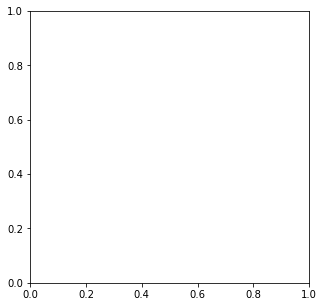

In [103]:

# Directory for saving frames
frame_dir = 'frames'
os.makedirs(frame_dir, exist_ok=True)

# Number of frames for a 1-minute video at 30 FPS
num_frames = 60 * 30  

for frame in range(num_frames):
    fig, ax = plt.subplots(figsize=(5, 5))
    gdf = gpd.GeoDataFrame(
        [{'geometry': Point(lon, lat), 'color': hex_to_rgb(color)} 
         for (lat, lon), color in decimal_points_with_colors]
    )

    base_patch_size = 0.007
    for point in gdf.itertuples():
        patch_size = base_patch_size * random.uniform(0.5, 1.5)
        ax.add_patch(plt.Rectangle(
            (point.geometry.x - patch_size / 2, point.geometry.y - patch_size / 2),
            patch_size, patch_size,
            color=point.color, alpha=0.7)
        )

    bounds = gdf.total_bounds
    padding = 0.005
    ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
    ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(os.path.join(frame_dir, f'frame_{frame:04d}.png'), dpi=300)
    plt.close(fig)

# Use a tool like ffmpeg to stitch the frames together into a video


In [53]:
import os

In [55]:
os.listdir('./pkl')

['afternoon_ferihumerstrasse_1671.pkl',
 'morning_ferihumerstrasse_3218.pkl',
 'afternoon_ferihumerstrasse_1667.pkl',
 'zcr',
 'afternoon_mozartkreuzung_3227.pkl',
 'afternoon_mozartkreuzung_3233.pkl',
 '.DS_Store',
 'afternoon_ferihumerstrasse_1663.pkl',
 'afternoon_hauptplatz_0428.pkl',
 'afternoon_mozartkreuzung_3225.pkl',
 'morning_mozartkreuzung_7399.pkl',
 'morning_mozartkreuzung_7401.pkl',
 'tuned',
 'norm',
 'morning_hauptplatz_1642.pkl',
 'morning_mozartkreuzung_7397.pkl',
 '.ipynb_checkpoints',
 'morning_ferihumerstrasse_3212.pkl',
 'morning_hauptplatz_1634.pkl',
 'afternoon_hauptplatz_0431.pkl',
 'afternoon_hauptplatz_0418.pkl',
 'morning_ferihumerstrasse_3215.pkl',
 'morning_hauptplatz_1632.pkl',
 'rms']

In [ ]:
def plot_rms_and_get_color(file_name):
    # Load RGB data
    rgb_data_path = f'./pkl/norm/{file_name}'
    rgb_df = pickle.load(open(rgb_data_path, 'rb'))

    # Load the RMS data
    rms_data_path = f'./pkl/rms/{file_name}'
    rms_df = pickle.load(open(rms_data_path, 'rb'))

    fps = 29 if rgb_df.shape[0] % 29 == 0 else 30
    if fps == 29:
        rms_df = resample_dataframe(rms_df, 17400)

    rms_diff = rms_df.diff().abs()
    max_change_index = rms_diff.idxmax()[0]
    start_index = max_change_index - fps
    end_index = max_change_index + fps
    subset_df = rms_df.iloc[start_index:end_index]

    # Extract the relevant frames from the RGB data
    rgb_subset_df = rgb_df.iloc[start_index:end_index]
    overall_mean_rgb = rgb_subset_df.mean().astype(int)

    # Convert the average RGB values to a HEX color code
    color_code = "#{:02x}{:02x}{:02x}".format(overall_mean_rgb['sum_R'], 
                                              overall_mean_rgb['sum_G'], 
                                              overall_mean_rgb['sum_B'])

    conversion_factor = fps * 60

    # Convert frame indices to time in minutes for plotting
    time_values = rms_df.index / conversion_factor
    max_change_time = max_change_index / conversion_factor

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    # RMS plot on the left subplot
    ax1.plot(time_values, rms_df.values, label='RMS Values', linestyle='-')
    ax1.axvline(x=max_change_time, color='r', linestyle='--', label='Max Change Point')
    ax1.set_xlabel('Time (minutes)')
    ax1.set_ylabel('RMS Value')
    ax1.set_title(f"RMS Values for {file_name.split('.')[0]}")
    ax1.legend(loc='upper right')
    ax1.grid(True)
    
    # Color square on the right subplot
    ax2.axis('off')  # Turn off the axis
    ax2.add_patch(patches.Rectangle((0, 0), 1, 1, facecolor=color_code))
    ax2.text(0.5, 0.5, color_code, ha='center', va='center', fontsize=12, color='white' if sum(overall_mean_rgb) < 380 else 'black')
    ax2.set_title('Average Color')
    
    plt.tight_layout()
    plt.savefig(f"./color/{file_name.split('.')[0]}_{color_code}.png", dpi=100)
    plt.show()


for file in files:
    color = plot_rms_and_get_color(file)

In [6]:
import folium
from folium.plugins import MarkerCluster

def dms_to_dd(dms):
    degrees, minutes, seconds, direction = dms
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60)
    if direction in ['S', 'W']:
        dd *= -1
    return dd

# Define coordinates in DMS and corresponding hex RGB values
# Format: [((latitude DMS), (longitude DMS)), 'hex_color']
points_with_colors = [
    (((48, 18, 50.4, 'N'), (14, 17, 8.52, 'E')), '#d5d8e0'), # video taken at ferihumerstrasse in afternoon time, IMG_1663.mov
    (((48, 18, 57.96, 'N'), (14, 17, 16.44, 'E')), '#d6d8d0'), # video taken at ferihumerstrasse in afternoon time, IMG_1667.mov
    (((48, 18, 50.76, 'N'), (14, 17, 17.88, 'E')), '#e3e3dd'), # video taken at ferihumerstrasse in afternoon time, IMG_1671.mov
    
    (((48, 18, 21.24, 'N'), (14, 17, 11.04, 'E')), '#dadcdc'), # video taken at hauptplatz in afternoon time, IMG_0418_s.mov
    (((48, 18, 24.84, 'N'), (14, 17, 10.32, 'E')), '#dcdedd'), # video taken at hauptplatz in afternoon time, IMG_0428_s.mov
    (((48, 18, 24.12, 'N'), (14, 17, 8.16, 'E')), '#eaecea'), # video taken at hauptplatz in afternoon time, IMG_0431_s.mov    
    (((48, 18, 5.76, 'N'), (14, 18, 1.44, 'E')), '#d5d5d7'), # video taken at sudbahnmarket in afternoon time, IMG_0439.mov
    (((48, 18, 0, 'N'), (14, 18, 5.4, 'E')), '#d2d2d3'), # video taken at sudbahnmarket in afternoon time, IMG_0440.mov
    (((48, 18, 0, 'N'), (14, 18, 7.2, 'E')), '#e1d5d4'), # video taken at sudbahnmarket in afternoon time, IMG_0441.mov    
]

# Convert DMS coordinates to decimal degrees
decimal_points_with_colors = [((dms_to_dd(lat_dms), dms_to_dd(lon_dms)), color) for (lat_dms, lon_dms), color in points_with_colors]

# Calculate the center of the map based on the coordinate bounds
latitudes = [lat for (lat, lon), _ in decimal_points_with_colors]
longitudes = [lon for (lat, lon), _ in decimal_points_with_colors]
center_lat = sum(latitudes) / len(latitudes)
center_lon = sum(longitudes) / len(longitudes)

# Create a Folium map centered at the calculated center coordinates
map_center = [center_lat, center_lon]
map_zoom = 14
m = folium.Map(location=map_center, zoom_start=map_zoom)

# Create a marker cluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for (lat, lon), color in decimal_points_with_colors:
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Display the map
m